In [1]:
import numpy as np

## Inside a numpy array

### Dimensions


![arrayshapes.png](images/arrayshapes.png)

In [2]:
a = np.random.randint(low=1, high=10, size=(3, 3))
print(a)

[[2 2 2]
 [7 6 2]
 [7 9 6]]


In [3]:
def print_info(a):
    print('number of elements:', a.size)
    print('number of dimensions:', a.ndim)
    print('shape:', a.shape)
    print('data type:', a.dtype) #int, float, boolean
    
print_info(a)

number of elements: 9
number of dimensions: 2
shape: (3, 3)
data type: int64


## Broadcasting

In numpy, broadcasting is a powerful mechanism that allows arrays of different shapes to be combined together in arithmetic operations. It enables efficient computation and avoids the need for explicit loops or creation of large intermediate arrays

In [4]:
x = np.arange(4)
print(x)

[0 1 2 3]


I want to add 3 to each element of x

In [5]:
print('Easy', x + 3) #This is what you want to do

Easy [3 4 5 6]


In [6]:
#Make a new copy of array
#Loop through array and add 3
newx = x.copy()
for i in np.arange(x.size):
    newx[i] = newx[i] + 3
print('Dumb', newx)

#Stretch out 3 to the same shape of array
#Add x + 3
new3 = np.ones_like(x)*3
x = x + new3
print('Dumb', x)

Dumb [3 4 5 6]
Dumb [3 4 5 6]



We can think of broadcasting as an operation that stretches or duplicates the value 3 into the array [3, 3, 3, 3], and adds the results. 

The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

![broadcast_1D.png](images/broadcast_1D.png)

## 2D broadcasting

In [7]:
a = np.array([1, 2, 3])   # shape: (3,)
b = np.array([[4, 5, 6], [7, 8, 9]])   # shape: (2, 3)

print(a.shape)
print()
print(b.shape)

(3,)

(2, 3)


If I wanted to add a to each row of b

In [8]:
print('Easy')
print(a + b)

print()

#I dont need to loop through each row of b and add a
print('Dumb')
for i in b:
    print(i + a)

Easy
[[ 5  7  9]
 [ 8 10 12]]

Dumb
[5 7 9]
[ 8 10 12]


![2dbroadcasting.png](images/2dbroadcasting.png)

## Why does this matter?
+ Efficient element wise operations with numpy
+ Simplifies code
+ Flexibly manipulate data
+ Understand broadcasting errors

## Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between two arrays


Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side : Pad

Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape : Stretch

Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised : Error

### Broadcasting example 1

In [9]:
a = np.array([1, 2, 3])   # shape: (3,)
b = np.array([[4, 5, 6], [7, 8, 9]])   # shape: (2, 3)

print(a.shape)
print()
print(b.shape)

(3,)

(2, 3)


### Rule 1: Pad

>If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side

We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:

a.shape -> (1, 3)

b.shape -> (2, 3)

### Rule 2: Stretch

> If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched or "broadcast" to match the other shape.


By rule 2, we now see that the first dimension disagrees, so we stretch this dimension in a to match:

a.shape -> (2, 3)

b.shape -> (2, 3)

The shapes match, and we see that the final shape will be (2, 3)

In [10]:
(a+b).shape

(2, 3)

### Broadcasting example 2

In [11]:
a = np.array([1, 2])[:, np.newaxis]
b = np.array([[4, 5, 6], [7, 8, 9]])

In [12]:
#newaxis?

In [13]:
print(a.shape)
print()
print(b.shape)

(2, 1)

(2, 3)


In [14]:
(a+b).shape

(2, 3)

### Broadcasting example 3

In [15]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])

In [16]:
print(a.shape)
print()
print(b.shape)

(3, 2)

(3,)


In [17]:
(a+b).shape

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

![Notcompatible.png](images/Notcompatible.png)

In [18]:
print(a.shape)
print()
print(b.shape)

(3, 2)

(3,)


### Rule 3 : Error
>If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

But numpy should have just padded on the right....
>thats not how the broadcasting rules work! It would lead to potential areas of ambiguity. If right-side padding is what you'd like, you can do this explicitly by reshaping the array 

In [19]:
a = np.ones((3, 2))
b = np.array([4, 5, 6])[:, np.newaxis]
# b = np.array([4, 5, 6]).reshape((3, 1))

In [20]:
print(a.shape)
print()
print(b.shape)

(3, 2)

(3, 1)


In [21]:
(a+b).shape

(3, 2)

![newaxis.png](images/newaxis.png)

### Broadcasting example 4

These broadcasting rules apply to any binary ufunc

In [22]:
a = np.ones((3, 2))
b = np.random.randint(1,10, (3, 1))
print(a.shape)
print(b.shape)
print((a/b).shape)

(3, 2)
(3, 1)
(3, 2)


### Broadcasting Examples 5
This can be translated to any number of dimensions

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): ????
```

```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  ????
```

### Recap

```
Scalar    2D           3D           Bad

( ,)     (3, 4)     (3, 5, 1)    (3, 5, 2)
(3,)     (3, 1)     (      8)    (      8)
----     ------     ---------    ---------
(3,)     (3, 4)     (3, 5, 8)       XXX
```

## Broadcasting exercises

### Exercise1: warm up

```What is the expected output shape for each operation?```

In [23]:
a = np.arange(5)
b = 5

np.shape(a-b)==(5,)

True

In [24]:
a = np.ones((7, 1))
b = np.arange(7)
np.shape(a*b)==(7, 7)

True

In [25]:
a = np.random.randint(0, 50, (2, 3, 3))
b = np.random.randint(0, 10, (3, 1))

np.shape(a-b)==(2, 3, 3)

True

In [26]:
a = np.arange(100).reshape(10, 10)
b = np.arange(1, 10)

np.shape(a+b) == #Error

SyntaxError: invalid syntax (<ipython-input-26-7de42392230b>, line 4)

### Exercise 2:

```
1. Create a random 2D array of dimension (5, 3)
2. Calculate the maximum value of each row
3. Divide each row by its maximum
```

Remember to use broadcasting : NO FOR LOOPS!

In [27]:
## Your code here
a = np.random.randint(1, 10, (5, 3))
m = np.max(a, axis=1)
print(np.shape(a))
print(np.shape(m))

(5, 3)
(5,)


In [28]:
a/m[:, np.newaxis] #newaxis helps to pad array on the right for broadcasting

array([[0.5       , 1.        , 0.66666667],
       [1.        , 0.6       , 0.4       ],
       [0.625     , 1.        , 0.25      ],
       [0.44444444, 1.        , 0.77777778],
       [0.71428571, 1.        , 0.85714286]])

### Exercise 3

Task: Find the closest **cluster** to the **observation**. 

Again, use broadcasting: DO NOT iterate cluster by cluster

In [29]:
observation = np.array([30.0, 99.0]) #Observation

#Clusters
clusters = np.array([[102.0, 203.0],
             [132.0, 193.0],
            [45.0, 155.0], 
            [57.0, 173.0]])

Lets plot this data

In the plot below, **+** is the observation and dots are the cluster coordinates

cluster 0
cluster 1
cluster 2
cluster 3


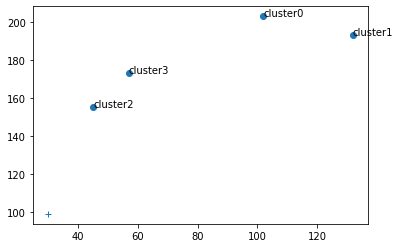

In [30]:
import matplotlib.pyplot as plt 

plt.scatter(clusters[:, 0], clusters[:, 1]) #Scatter plot of clusters
for n, x in enumerate(clusters):
    print('cluster %d' %n)
    plt.annotate('cluster%d' %n, (x[0], x[1])) #Label each cluster
plt.plot(observation[0], observation[1], '+'); #Plot observation

Closest cluster as seen by the plot is **2**. Your task is to write a function to calculate this


**hint:** Find the distance between the observation and each row in the cluster. The cluster to which the observation belongs to is the row with the minimum distance.

distance = $\sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$

In [31]:
## Your code here
diff = observation-clusters #substracting values with broadcasting
dist = np.sqrt(np.sum(diff**2, axis=1))
closest = np.argmin(dist)
print('Closest cluster is %d' %closest)

Closest cluster is 2


## Sources + Resources

ASPP 2016 - Stéfan van der Walt - https://github.com/ASPP/2016_numpy

Basic Numpy: http://scipy-lectures.org/intro/numpy/index.html

Advanced Numpy: http://scipy-lectures.org/advanced/advanced_numpy/index.html

Numpy chapter in "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html